In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit


# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [0]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


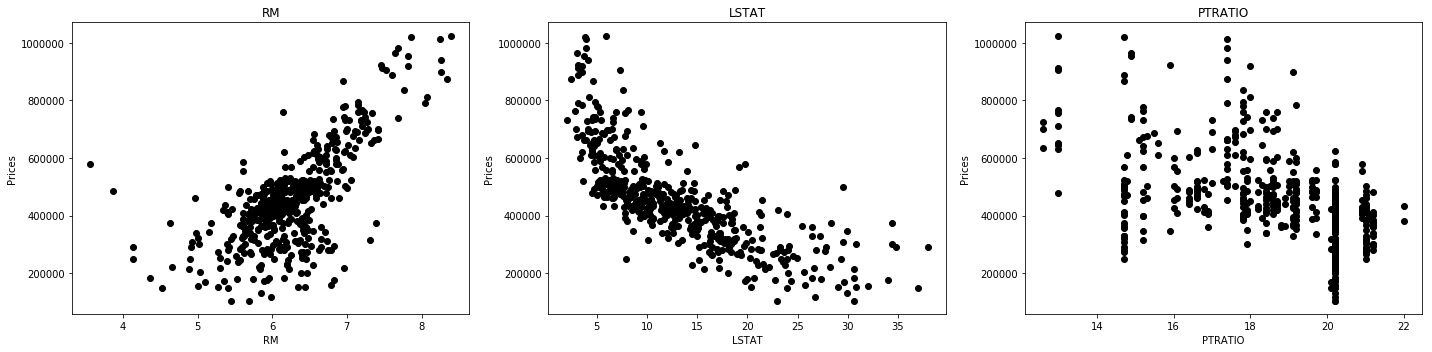

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'o', color='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

In [0]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [0]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


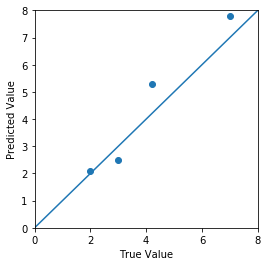

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
true_value = [3, -0.5, 2, 7, 4.2]
pred_value = [2.5, 0.0, 2.1, 7.8, 5.3]
ax_min = 0
ax_max = 8
plt.scatter(true_value,pred_value)
plt.plot([ax_min,ax_max],[ax_min,ax_max])
plt.xlim([ax_min,ax_max])
plt.ylim([ax_min,ax_max])
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [0]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split 

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=17)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [0]:
#Create a linear regression model to predict the median housing values based on 3 parameters.
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

pred=lr.predict(X_test)
pred

array([407483.76224815, 687146.32050169, 157565.88869168, 643826.54616843,
       519167.21290411, 206768.42134043, 416756.64067809, 420101.74346842,
       419579.66762357, 363644.12455371, 669291.18117074, 421481.37585331,
       429495.53536388, 377769.23642649, 593330.55922182, 501381.24011061,
       430059.29862521, 460026.66858628, 497989.24561178, 419516.20390969,
       684008.19027468, 335324.51688938, 568226.32902823, 358321.49439619,
       621741.73946227, 569752.24965637, 651588.89827856,  62410.67404758,
       107216.2022088 , 469830.68871949, 466468.96907088, 702107.72336913,
       511941.63438415, 707945.40298694, 308576.21139877, 488054.92670016,
       342473.27655144, 721006.94208147,   6044.61110243, 513487.30640413,
       451199.09656752, 349600.2991965 , 488364.41235355, 263929.44491744,
       339336.60011897, 595439.21216399, 489776.70938229, 569532.68369099,
       569976.79912254, 622554.24476004, 425704.80972237, 449713.5255361 ,
       435810.41387978, 4

In [0]:
#The accuracy score for the linear model
from sklearn.metrics import r2_score

score=r2_score(y_test,pred)
score

0.7617468033920176

In [0]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=88)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [0]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [0]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $412,950.00
Predicted selling price for Client 2's home: $234,529.79
Predicted selling price for Client 3's home: $896,962.50


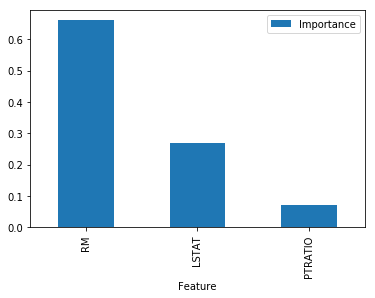

In [0]:
%matplotlib inline
pd.DataFrame(zip(X_train.columns, reg.feature_importances_), 
             columns=['Feature', 'Importance']).set_index('Feature').plot(kind='bar')

In [0]:
from IPython.display import display
#Find houses in the dataset with similar price as Client 1
data[(data['MEDV']>400000) & (data['MEDV']<406000)].sort_values('MEDV').describe()

,RM,LSTAT,PTRATIO,MEDV
count,11.000000,11.000000,11.000000,11.000000
mean,5.929455,14.597273,18.763636,403390.909091
std,0.274452,4.667736,1.982560,1982.147596
min,5.404000,9.970000,14.700000,401100.000000
25%,5.799500,11.165000,17.800000,401100.000000
50%,5.926000,13.440000,18.600000,403200.000000
75%,6.067500,16.555000,20.200000,405300.000000
max,6.458000,23.980000,21.200000,405300.000000


In [0]:
from IPython.display import display
#Find houses in the dataset with similar price as Client 2
data[(data['MEDV']>232000) & (data['MEDV']<242000)].sort_values('MEDV').describe()

,RM,LSTAT,PTRATIO,MEDV
count,2.000000,2.000000,2.0,2.000000
mean,5.463000,22.225000,20.2,239400.000000
std,0.103238,1.944544,0.0,2969.848481
min,5.390000,20.850000,20.2,237300.000000
25%,5.426500,21.537500,20.2,238350.000000
50%,5.463000,22.225000,20.2,239400.000000
75%,5.499500,22.912500,20.2,240450.000000
max,5.536000,23.600000,20.2,241500.000000


In [0]:
#Find houses in the dataset with similar price as Client 3
data[(data['MEDV']>910000) & (data['MEDV']<950000)].sort_values('MEDV').describe()

,RM,LSTAT,PTRATIO,MEDV
count,4.000000,4.00000,4.000000,4.000000
mean,7.752500,3.49500,16.075000,924525.000000
std,0.381727,0.47683,2.232151,11676.579122
min,7.454000,3.11000,13.000000,913500.000000
25%,7.466000,3.14750,15.175000,918225.000000
50%,7.645000,3.36500,16.650000,921900.000000
75%,7.931500,3.71250,17.550000,928200.000000
max,8.266000,4.14000,18.000000,940800.000000
